# Combinação de modelos de ML com Bagging e Boosting

## Dataset e problema

A base de dados é composta por informações de clientes de uma companhia, juntamente com a avaliação de diversos atributos/experiências com um voo que este cliente fez e seu grau de satisfação ("satisfied" e "neutral or dissatisfied"). Queremos criar um modelo de ML que faça a predição do grau de satisfação para novos dados.

Os dados já estão separados em treino e teste, disponívels em duas URLs.

In [1]:
url1 = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/train.csv'
url2 = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/test.csv'

In [2]:
import pandas as pd

train = pd.read_csv(url1)
test = pd.read_csv(url2)

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Tratamento dos dados

Podemos verificar se há dados nulos/vazios com a função `isna` (é similar ao `isnull` e na prática podem ser vistas como sinônimas).

In [5]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
test.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Tanto no dataset de treino quanto no de teste há dados inválidos na coluna "Arrival Delay in Minutes". Além disso, algumas colunas como id e Unnamed não servem para o modelo. Outro ponto é que temos colunas com valores categóricos. 

Iremos fazer a remoção das colunas e linhas indesejadas, bem como efetuar a codificação das colunas categóricas e já separar os dados em X e y. Tudo isso em uma única função:

In [7]:
def preprocess_db(df):
    cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
    df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
    df.dropna(inplace=True)
    df = pd.get_dummies(df, columns=cat_cols)
    X = df.drop('satisfaction', axis=1)
    y = df['satisfaction']
    return X, y

In [8]:
X_train, y_train = preprocess_db(train)

In [9]:
X_test, y_test = preprocess_db(test)

In [10]:
X_train.isna().sum().sum()

0

## Modelagem

Utilizaremos uma árvore de decisão com os parâmetros default como **primeiro modelo (Modelo 1)**. 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

model_1 = DecisionTreeClassifier(random_state=42)

In [12]:
# accuracy is the default scoring value for classification models in cross_validate
cv_results = cross_validate(model_1, X_train, y_train, cv=5)

In [13]:
cv_results['test_score'].mean()

0.9443500672495754

In [14]:
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.94612443517553

Podemos ver que o Modelo 1 performa bem em termos de acurácia, tanto nos dados de teste quanto nos resultados da validação cruzada, com resultados acima de 94%.

O **segundo modelo (Modelo 2)** será criado com regressão logística. Para modelos assim, o melhor é transformar os dados para deixá-los em uma mesma escala. Isso será feito com o `StandardScaler`.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model_2 = LogisticRegression(random_state=42)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model_2)
])

cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [17]:
cv_results['test_score'].mean()

0.8749541859894492

Os resultados para este segundo modelo foram inferiores. 

Acontece que cada modelo segue uma estratégia diferente para classificação dos dados, dando importâncias diferentes para alguns padrões lineares e não-lineares.

O objetivo agora é tentar **combinar** ambos os modelos, e verificar se essa combinação não resulta em modelo que consiga obter resultados ainda melhores.

Do curso: "Árvores para relações não-lineares e [Regressão] Logística para relações lineares. Por existirem diferenças nas características de cada modelo existe a possibilidade de que a combinação dos métodos nos ajude na construção de um modelo final que aproveite o melhor de cada um.".

## Combinando modelos com `VotingClassifier`

Vamos criar um terceiro modelo (Modelo 3) baseado no Naive Bayes Gaussian. Vamos usar um número ímpar de modelos em uma combinação por votação, para prevenir empates em uma votação cuja saída é binária.

In [18]:
from sklearn.naive_bayes import GaussianNB

model_3 = GaussianNB()

Vamos passar os três modelos em um pipeline para fazer a escala dos dados e armazenar estes pipelines em uma lista. Escalar os dados não interfere no funcionamento do Modelo 1.

In [19]:
model_names = ['Tree', 'Logistic_Regression', 'Naive_Bayes']
pipelines = []

for model, name in zip([model_1, model_2, model_3], model_names):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])

    cv_results = cross_validate(pipe, X_train, y_train, cv=5)
    print(cv_results['test_score'].mean())

    pipelines.append(pipe)

0.9443983339909126
0.8749541859894492
0.8483406855152964


Para combinar os modelos, podemos utilizar o `VotingClassifier`. 

Do curso: "O `VotingClassifier` é uma técnica poderosa porque permite combinar modelos que são bons em capturar diferentes tipos de padrões nos dados. Por exemplo, um modelo pode ser bom em capturar tendências lineares, enquanto outro pode ser bom em capturar interações não lineares. Ao combiná-los com o `VotingClassifier`, você pode capturar ambos os tipos de padrões."

Em uma classificação, ele aplica o fit e o predict em cada modelo, obtendo uma lista de classes resultantes. O resultado final é decidido de acordo com o tipo de votação aplicado. O padrão é `voting='hard'`, cujo resultado é baseado na maioria (a classe que mais saiu):

In [20]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=list(zip(model_names, pipelines)),
    voting='hard' # hard is already the default value
)

In [21]:
voting

VotingClassifier(estimators=[('Tree',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('Tree',
                                               DecisionTreeClassifier(random_state=42))])),
                             ('Logistic_Regression',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('Logistic_Regression',
                                               LogisticRegression(random_state=42))])),
                             ('Naive_Bayes',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('Naive_Bayes', GaussianNB())]))])

In [22]:
cv_results = cross_validate(voting, X_train, y_train, cv=5)

In [23]:
cv_results['test_score'].mean()

0.8917601803912731

Com essa primeira estratégia de combinação, conseguimos obter um resultado inferior ao Modelo 1 e superior ao dos Modelos 2 e 3. Vamos ver como ele se sai com outro tipo de votação, a `soft`. 

In [24]:
voting = VotingClassifier(
    estimators=list(zip(model_names, pipelines)), 
    voting='soft'
)
cv_results = cross_validate(voting, X_train, y_train, cv=5)
cv_results['test_score'].mean()

0.9007375478071673

Os resultados com a votação "soft" (votação ponderada) foram ligeiramente melhores.

A votação soft atribui um peso diferente ao resultado de cada modelo, que seria a "confiança" que a votação tem no resultado daquele modelo. Isso é feito internamente pelo VotingClassifier (mas pode ser influenciado ao setar o atributo `weights`).

Podemos ver o VotingClassifier como um modelo e seus parâmetros como hiperparâmetros. Desse modo, podemos utilizar o grid search para buscar pelos melhores parâmetros. Vamos permutar pesos diferentes a cada modelo e verificar como o modelo final se sai.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'voting': ['hard', 'soft'],
    'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]
}

grid_search = GridSearchCV(voting, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('Tree',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('Tree',
                                                                      DecisionTreeClassifier(random_state=42))])),
                                                    ('Logistic_Regression',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('Logistic_Regression',
                                                                      LogisticRegression(random_state=42))])),
                                                    ('Naive_Bayes',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('Naive_Bayes',
                                                                      GaussianNB())]))],
                                        voting='soft'),
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1),
                                     (1, 1, 2)]})

In [26]:
grid_search.best_params_

{'voting': 'soft', 'weights': (2, 1, 1)}

In [27]:
grid_search.best_score_

0.9443983339909126

In [28]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9462402966052601

Podemos ver que com esses parâmetros otimizados, a árvore de decisão terá um peso maior na votação. O score obtido é muito próximo do obtido utilizando somente a árvore de decisão (esse foi o resultado obtido para este nosso problema e com essa configuração de modelos, mas nem sempre é assim).

## "Bagging" e "Boosting"

São duas estratégias para combinar modelos.

Artigo comparando Bagging e Boosting: https://www.alura.com.br/artigos/machine-learning-tecnicas-bagging-boosting

## Combinando modelos com a estratégia de "Bagging"

Abreviação de "bootstrap aggregating".

A estratégia de "bagging" é combinar modelos de **mesmo tipo** (árvores, por exemplo). No entanto, ao invés de passar todos os dados para cada modelo, o bagging irá passar somente **partes dos dados**, uma amostra, de modo que cada modelo consiga observar padrões diferentes nos dados que tem à disposição. As amostras são escolhidas de modo aleatório, com ou sem reposição (quando é com reposição, é chamado de "bootstrap"). A decisão final, no caso de árvores, é baseado em uma votação.

O foco com o bagging é reduzir a variância, isto é, fazer com que o modelo consiga performar bem com dados novos, diminuindo o overfitting.

**Curiosidade**: de acordo com essas definições, o Random Forest é um tipo de classificador bagging. No entanto, o Random Forest faz algo a mais: ele não só faz a amostragem dos dados, mas também *das features* (colunas), de modo que cada árvore tenha features diferentes.

### `BaggingClassifier`

O `BaggingClassifier` usa como padrão uma árvore de decisão como modelo base, distribuição dos dados com reposição, e quantidade de modelos (`n_estimators`) igual a 10. 

In [29]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [30]:
y_pred = bagging_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9586760900629514

Já com os valores padrões, conseguimos obter uma acurária melhor do que a combinação anterior e também melhor do que a obtida no Modelo 1. 

Vamos usar o grid search para procurar pelos melhores hiperparâmetros, e depois aplicá-los usando a árvore de decisão que criamos anteriormente com o pipeline.

- `max_samples`: proporção de linhas em cada amostra;

- `max_features`: proporção de features (colunas) em cada amostra.

In [31]:
param_grid = {
    'n_estimators': [10,20,30],
    'max_samples': [.5,.7,.9],
    'max_features': [.5,.7,.9]
}

bagging_grid = GridSearchCV(
    BaggingClassifier(),
    param_grid,
    cv=5
)

**Atenção**: demorou quase **30** minutos.

Salvando o treino em um arquivo para reúso.

In [32]:
# bagging_grid.fit(X_train, y_train)

In [33]:
# import pickle

# with open('bagging_grid.pkl', 'wb') as pickleFile:
#     pickle.dump(bagging_grid, pickleFile)

In [34]:
bagging_grid = pd.read_pickle('bagging_grid.pkl')

In [35]:
best_params = bagging_grid.best_params_
best_params

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 30}

In [36]:
base_model = pipelines[0]
bagging_classifier = BaggingClassifier(base_model, **best_params)

In [37]:
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                            ('Tree',
                                             DecisionTreeClassifier(random_state=42))]),
                  max_features=0.7, max_samples=0.7, n_estimators=30)

In [38]:
y_pred = bagging_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9626539991503495

Melhoramos um pouco mais a acurácia com este novo modelo.

**Dúvida**: Seguindo os passos dessa atividade, chegamos em um modelo que me lembra muito uma Random Forest. Nesse caso específico dos passos feitos no vídeo, criamos de fato uma Random Forest? Se não for isso, qual seria a diferença?

Coloquei essa dúvida [no fórum](https://cursos.alura.com.br/forum/topico-duvida-criamos-um-randomforest-com-o-baggingclassifier-349878) e estou aguardando um retorno.

Fazendo o teste com a RandomForest:

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train)
accuracy_score(y_test, rfc.predict(X_test))

0.9638512339242267

### `ExtraTreesClassifier`

Extremely Randomized Trees. Usa também uma estratégia de bagging.

Em termos de código, o `ExtraTreesClassifier` é muito parecido com o `BaggingClassifier`, não precisando do parâmetro `max_samples` (acho que isso não é verdade, pois o parâmetro existe sim e é usado pelo modelo; não entendi por que o instrutor disse isso).

Do Bard: 

"ExtraTreesClassifier: Uses Extremely Randomized Trees (Extra-Trees), which introduce additional randomness in the split selection process.

- Splits are randomly chosen from a subset of features rather than evaluating all possible splits.

- Thresholds for splits are also selected randomly within the feature's range, not just at the optimal point."

"ExtraTreesClassifier introduces more randomness than BaggingClassifier, potentially leading to better performance but also slightly higher computational cost."

Do curso: "Durante a construção das árvores o ExtraTrees seleciona aleatoriamente um subconjunto de colunas e, para cada recurso, escolhe um ponto de divisão aleatório. Isto é, ele usa limites aleatórios para cada recurso. Já no BaggingClassifier cada árvore tenta encontrar o melhor ponto de divisão."

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [10,20,30],
    'max_features': [.5,.7,.9]
}

extra_grid_search = GridSearchCV(
    ExtraTreesClassifier(),
    param_grid,
    cv=5
)

In [41]:
extra_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 20, 30]})

In [43]:
best_params = extra_grid_search.best_params_
best_params

{'max_features': 0.7, 'n_estimators': 30}

In [44]:
extratrees_classifier = ExtraTreesClassifier(**best_params)
extratrees_classifier.fit(X_train, y_train)
accuracy_score(y_test, extratrees_classifier.predict(X_test))

0.9628471015332329

In [45]:
extra_grid_search.best_score_

0.9623530394696044

Obtemos resultados semelhantes ao do `BaggingClassifier`. Por não ter usado `max_samples` no grid_search, o processo de fit foi bem mais rápido, 5min55s. 

(no entanto, ainda estou em dúvida com relação ao não uso de `max_samples`... Se eu retirar esse hiperparâmetro do grid search do `BaggingClassifier`, obtenho um tempo de fit de 4min49s. Código comentado a seguir.)

In [47]:
# bagging_grid = GridSearchCV(
#     BaggingClassifier(),
#     param_grid,
#     cv=5
# )
# bagging_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 20, 30]})

## Combinando modelos com a estratégia de "Boosting"


### `AdaBoostClassifier`

Adaptive Boosting.

Também utiliza árvores por padrão, porém, a estratégia de boosting é criar uma primeira árvore e verificar onde ela erra mais. A partir disso, novas cópias dessa árvore são criadas (`n_estimators`), porém com **pesos diferentes** nos dados de treino, ajustados para lidar com os erros da árvore anterior (daí o boosting, melhoria). Cada árvore melhorada vai possuir uma contribuição (peso) na votação, de acordo com sua performance (taxa de erros); essa contribuição pode ser ajustada pelo hiperparâmetro `learning_rate`.

Vamos primeiro criar um modelo com os valores padrão (que usa um `DecisionTreeClassifier`).

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=1)

ada_boost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [49]:
accuracy_score(y_test, ada_boost.predict(X_test))

0.9263121306916927

Tivemos um valor de acurácia alta, mas ainda menor do que encontrado em outros modelos. Vamos ajustar os hiperparâmetros e fazer novas validações.

In [50]:
param_grid = {
    'n_estimators': [50,100,200],
    'learning_rate': [.1,.01,.001]
}

ada_grid_search = GridSearchCV(
    AdaBoostClassifier(),
    param_grid,
    cv=5
)

Outro ajuste demorado (16 minutos). Salvando em um arquivo pickle.

In [52]:
# ada_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]})

In [53]:
# import pickle

# with open('ada_grid_search.pkl', 'wb') as pickleFile:
#     pickle.dump(ada_grid_search, pickleFile)

In [55]:
ada_grid_search = pd.read_pickle('ada_grid_search.pkl')

In [56]:
ada_grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [57]:
ada_grid_search.best_score_

0.9258161725228913

In [58]:
accuracy_score(y_test, ada_grid_search.predict(X_test))

0.9248445525817789

Podemos perceber que não obtivemos uma melhora significativa nesse modelo, mesmo após buscar pelos hiperparâmetros mais otimizados.

### CatBoost

Category Boosting.

Essa é uma técnica de boosting totalmente diferente, não disponível no scikit-learn (necessário instalar `pip install catboost`), pois é desenvolvido por outra empresa, a Yandex. Também utiliza árvores como modelo base.

Ela lida bem com dados categóricos, sem a necessidade de aplicar um pré-processamento de encoding (na aula, no entanto, o instrutor continuou utilizando o X_train e X_test que já estavam com o encoding aplicado...).

O instrutor não deu detalhes sobre os hiperparâmetros ajustados.

Do curso: "O CatBoost opera em um processo iterativo onde constrói árvore por árvore. Cada árvore tenta corrigir os erros da árvore anterior, focando nos casos mais difíceis. Porém, ao contrário de outros algoritmos que ajustam os pesos dos dados, o CatBoost ajusta o valor do gradiente para cada árvore, melhorando a precisão do modelo de maneira incremental."

In [60]:
from catboost import CatBoostClassifier

param_grid = {
    'iterations': [100,200,300], # number of trees
    'depth': [4,6,8], # depth of the trees
    'learning_rate': [.1,.01,.001]
}

cat_grid_search = GridSearchCV(
    CatBoostClassifier(verbose=0), # with verbose, catboost will output several log information
    param_grid,
    cv=5,
    n_jobs=-1
)

Mais um demorado (8 minutos). O `n_jobs`, no entanto, parece melhorar o tempo. 

TODO: adicionar `n_jobs` nos grid searches anteriores.

In [61]:
# cat_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002228C46B700>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [62]:
# import pickle

# with open('cat_grid_search.pkl', 'wb') as pickleFile:
#     pickle.dump(cat_grid_search, pickleFile)

In [65]:
cat_grid_search = pd.read_pickle('cat_grid_search.pkl')

In [66]:
cat_grid_search.best_params_

{'depth': 8, 'iterations': 300, 'learning_rate': 0.1}

In [63]:
accuracy_score(y_test, cat_grid_search.predict(X_test))

0.9641988182134168

In [67]:
cat_grid_search.best_score_

0.9646794363912825

Podemos ver que obtivemos uma acurácia mais alta, semelhante ao obtido com modelos anteriores.

## Combinando modelos com a estratégia de "Stacking"

Essa é uma estratégia que acontece em dois níveis. Em um primeiro nível (nível 0), você treina modelos (iguais ou diferentes) com um mesmo conjunto de dados e verifica suas saídas (no caso de classificação, o resultado obtido por cada modelo). Ao contrário de uma estratégia de voting, você utiliza essas saídas como sendo as **entradas para outro modelo** (que estará no nível 1), modelo esse que você escolhe. 

Os modelos do nível 0 são chamados modelos base, e o modelo do nível 1 é chamado de meta-modelo.

Ou seja, no stacking criamos um meta-modelo cujos dados de treino **não** é a base de dados, mas sim resultados de outros modelos. A variável alvo de treino, no entanto, continua sendo a da base de dados.

O stacking não é limitado a 2 níveis. Você pode adicionar mais meta-modelos que aprendem com os anteriores, aumentando o stacking (nível). Não sei se isso é prático, no entanto.

Relembrando os modelos usados para o `VotingClassifier`. Podemos utilizá-lo como modelos base para o `StackingClassifier`. O `StackingClassifier` faz uma validação cruzada com o predict de cada modelo base, aumentando o número de "features" do meta-modelo:

In [68]:
list(zip(model_names, pipelines))

[('Tree',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('Tree', DecisionTreeClassifier(random_state=42))])),
 ('Logistic_Regression',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('Logistic_Regression', LogisticRegression(random_state=42))])),
 ('Naive_Bayes',
  Pipeline(steps=[('scaler', StandardScaler()), ('Naive_Bayes', GaussianNB())]))]

In [71]:
from sklearn.ensemble import StackingClassifier

base_models = list(zip(model_names, pipelines))
meta_model = LogisticRegression(random_state=42) # it can be any model; we just decided to use this one

stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1
)

In [72]:
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Tree',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('Tree',
                                                 DecisionTreeClassifier(random_state=42))])),
                               ('Logistic_Regression',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('Logistic_Regression',
                                                 LogisticRegression(random_state=42))])),
                               ('Naive_Bayes',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('Naive_Bayes',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

In [73]:
accuracy_score(y_test, stacking_classifier.predict(X_test))

0.9462402966052601

Obtivemos um valor igual ao obtido com o `VotingClassifier` com hiperparâmetros otimizados.

Podemos fazer combinações de modelos mais complexos, misturando modelos que utilizando bagging com modelos que utilizam boosting (isso também é possívle com o `VotingClassifier`). Além disso, há uma biblioteca, `mlxtend`, (`pip install mlxtend`) que disponibiliza uma forma de stacking com validação cruzada, o `StackingCVClassifier`. 

Vamos utilizar a `StackingCVClassifier`, passado como modelos base o CatBoost, o ExtraTrees e o NaiveBayes com os hiperparâmetros otimizados que encontramos anteriormente.

In [77]:
pipelines[2]

Pipeline(steps=[('scaler', StandardScaler()), ('Naive_Bayes', GaussianNB())])

In [92]:
cat_params = cat_grid_search.best_params_
extra_params = extra_grid_search.best_params_

base_models = [
    CatBoostClassifier(**cat_params, verbose=0),
    ExtraTreesClassifier(**extra_params),
    pipelines[2]
]

In [93]:
from mlxtend.classifier import StackingCVClassifier

stackingCV_classifier = StackingCVClassifier(
    classifiers=base_models,
    meta_classifier=meta_model
)

A mlxtend não trabalha com dados categóricos na variável alvo, então precisamos fazer um encoding nos dados de `y`. Podemos fazer isso em um mapeamento direto, sem a necessidade de uma função de encoding:

In [84]:
mapping = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}

In [85]:
y_train.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [87]:
y_train = y_train.replace(mapping)
y_train.value_counts()

0    58697
1    44897
Name: satisfaction, dtype: int64

In [88]:
y_test = y_test.replace(mapping)
y_test.value_counts()

0    14528
1    11365
Name: satisfaction, dtype: int64

In [94]:
stackingCV_classifier.fit(X_train, y_train)

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x000002228C746260>,
                                  ExtraTreesClassifier(max_features=0.7,
                                                       n_estimators=30),
                                  Pipeline(steps=[('scaler', StandardScaler()),
                                                  ('Naive_Bayes',
                                                   GaussianNB())])],
                     meta_classifier=LogisticRegression(random_state=42))

In [95]:
stackingCV_classifier.score(X_test, y_test)

0.9635808905881899

Novamente um valor semelhante ao de outros modelos. Podemos ainda ver se o modelo é consistente com diferentes amostragens dos dados de treino usando o `cross_validate`.

In [99]:
validation = cross_validate(stackingCV_classifier, X_train, y_train, cv=5, n_jobs=-1)

In [101]:
print(validation['test_score'])
print(validation['test_score'].mean())

[0.96254645 0.96447705 0.9613881  0.96582847 0.96515108]
0.9638782291720291


A mlxtend oferece outras métricas de validação e também uma matriz de confusão que podemos consultar:

In [103]:
from mlxtend.evaluate import scoring
y_pred = stackingCV_classifier.predict(X_test)
scoring(y_test, y_pred, metric='error')

0.03641910941181015

A métrica `error` é o complemento da acurácia (1 - acurácia).

In [104]:
scoring(y_test, y_pred, metric='precision')

0.9691213539791141

In [105]:
scoring(y_test, y_pred, metric='recall')

0.9472063352397713

In [106]:
scoring(y_test, y_pred, metric='f1')

0.9580385351310462

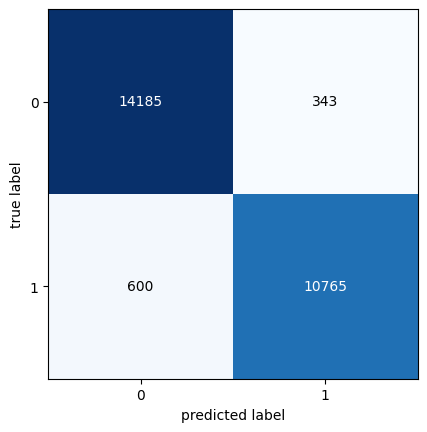

In [108]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mat);

## Simulando a preparação do modelo para produção

Podemos salvar o modelo em um arquivo utilizando a joblib

In [109]:
import joblib

joblib.dump(stackingCV_classifier, 'modelo_treinado.pkl') # 27MB

['modelo_treinado.pkl']

Como carregar o modelo:

In [110]:
loaded_model = joblib.load('modelo_treinado.pkl')

Vamos pegar uma linha de `X_test` e aplicar ao modelo carregado.

In [114]:
X_test.iloc[2]

Age                                   20.0
Flight Distance                      192.0
Inflight wifi service                  2.0
Departure/Arrival time convenient      0.0
Ease of Online booking                 2.0
Gate location                          4.0
Food and drink                         2.0
Online boarding                        2.0
Seat comfort                           2.0
Inflight entertainment                 2.0
On-board service                       4.0
Leg room service                       1.0
Baggage handling                       3.0
Checkin service                        2.0
Inflight service                       2.0
Cleanliness                            2.0
Departure Delay in Minutes             0.0
Arrival Delay in Minutes               0.0
Gender_Female                          0.0
Gender_Male                            1.0
Customer Type_Loyal Customer           0.0
Customer Type_disloyal Customer        1.0
Type of Travel_Business travel         1.0
Type of Tra

In [112]:
y_test[2]

0

In [118]:
prediction = loaded_model.predict([X_test.iloc[2]])

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [119]:
prediction[0]

0